## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [31]:
!nvidia-smi

Mon Feb 12 07:40:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [33]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


## Inference with Pre-trained COCO Model

In [34]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("projects-d5lak").project("indian-food-vitsx")
dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [35]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.1.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Indian-Food-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=F

In [36]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1707719159.1427c987e1ad.1075.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1740.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1741.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1742.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


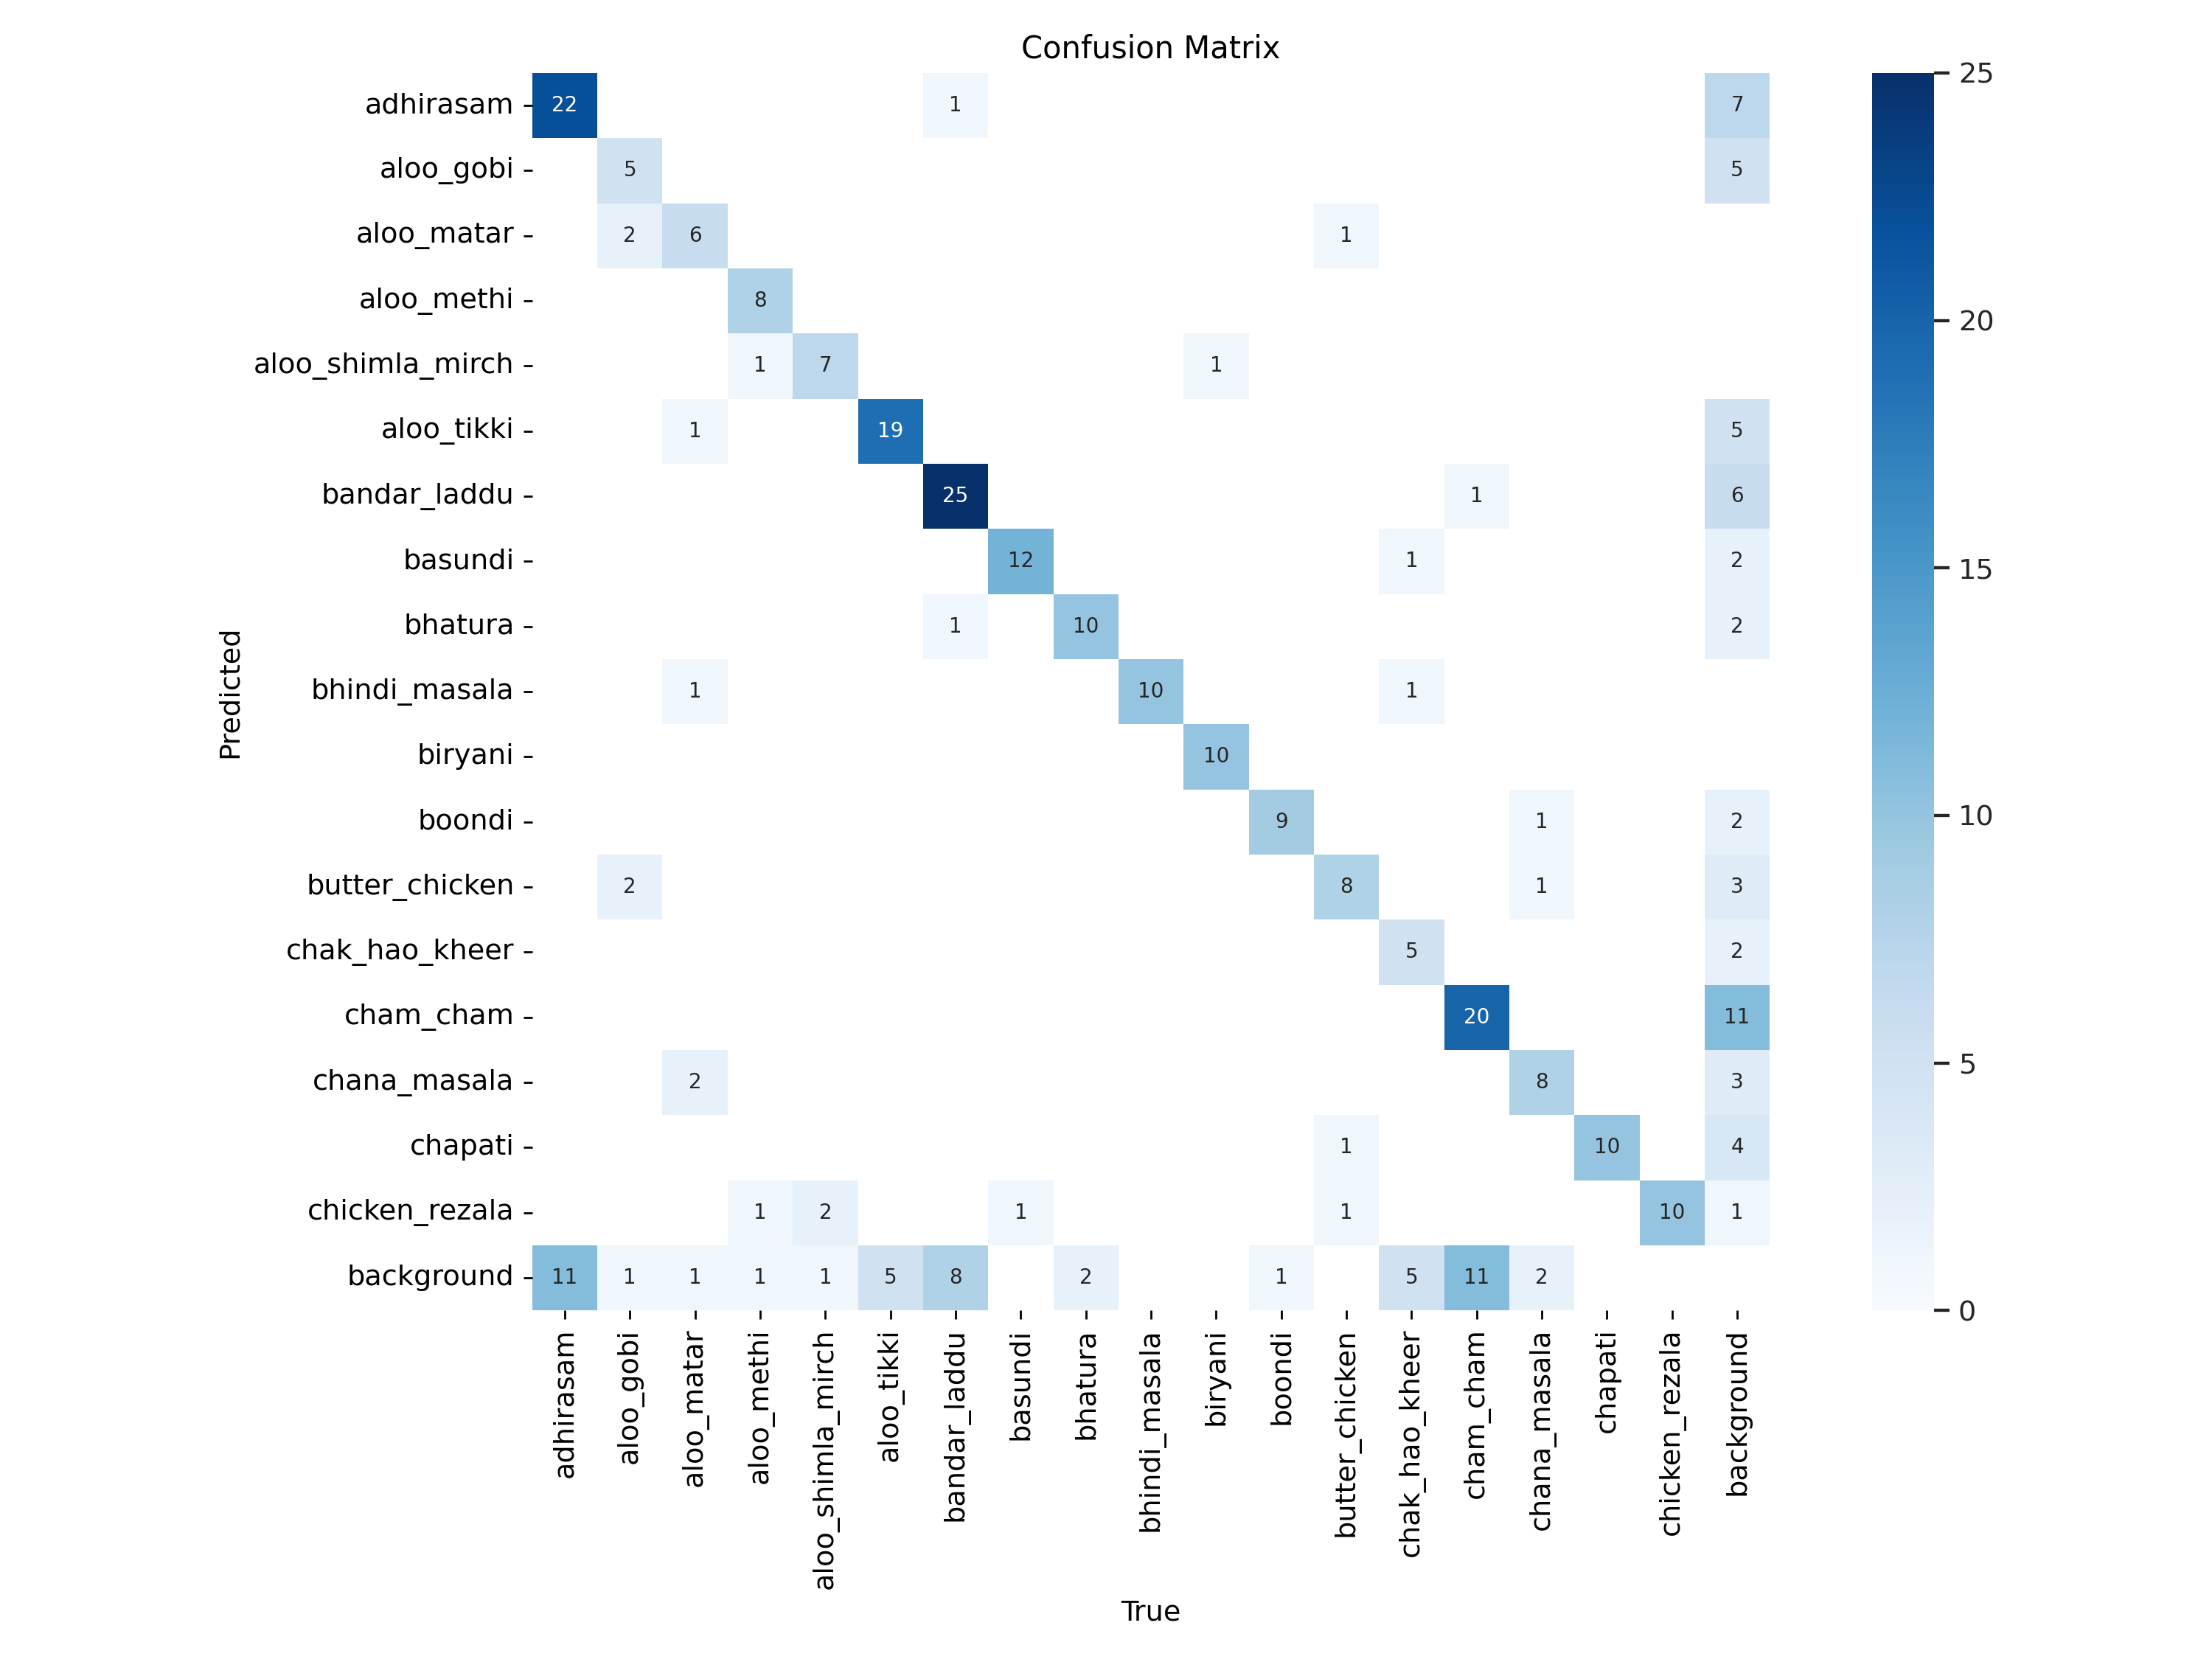

In [37]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


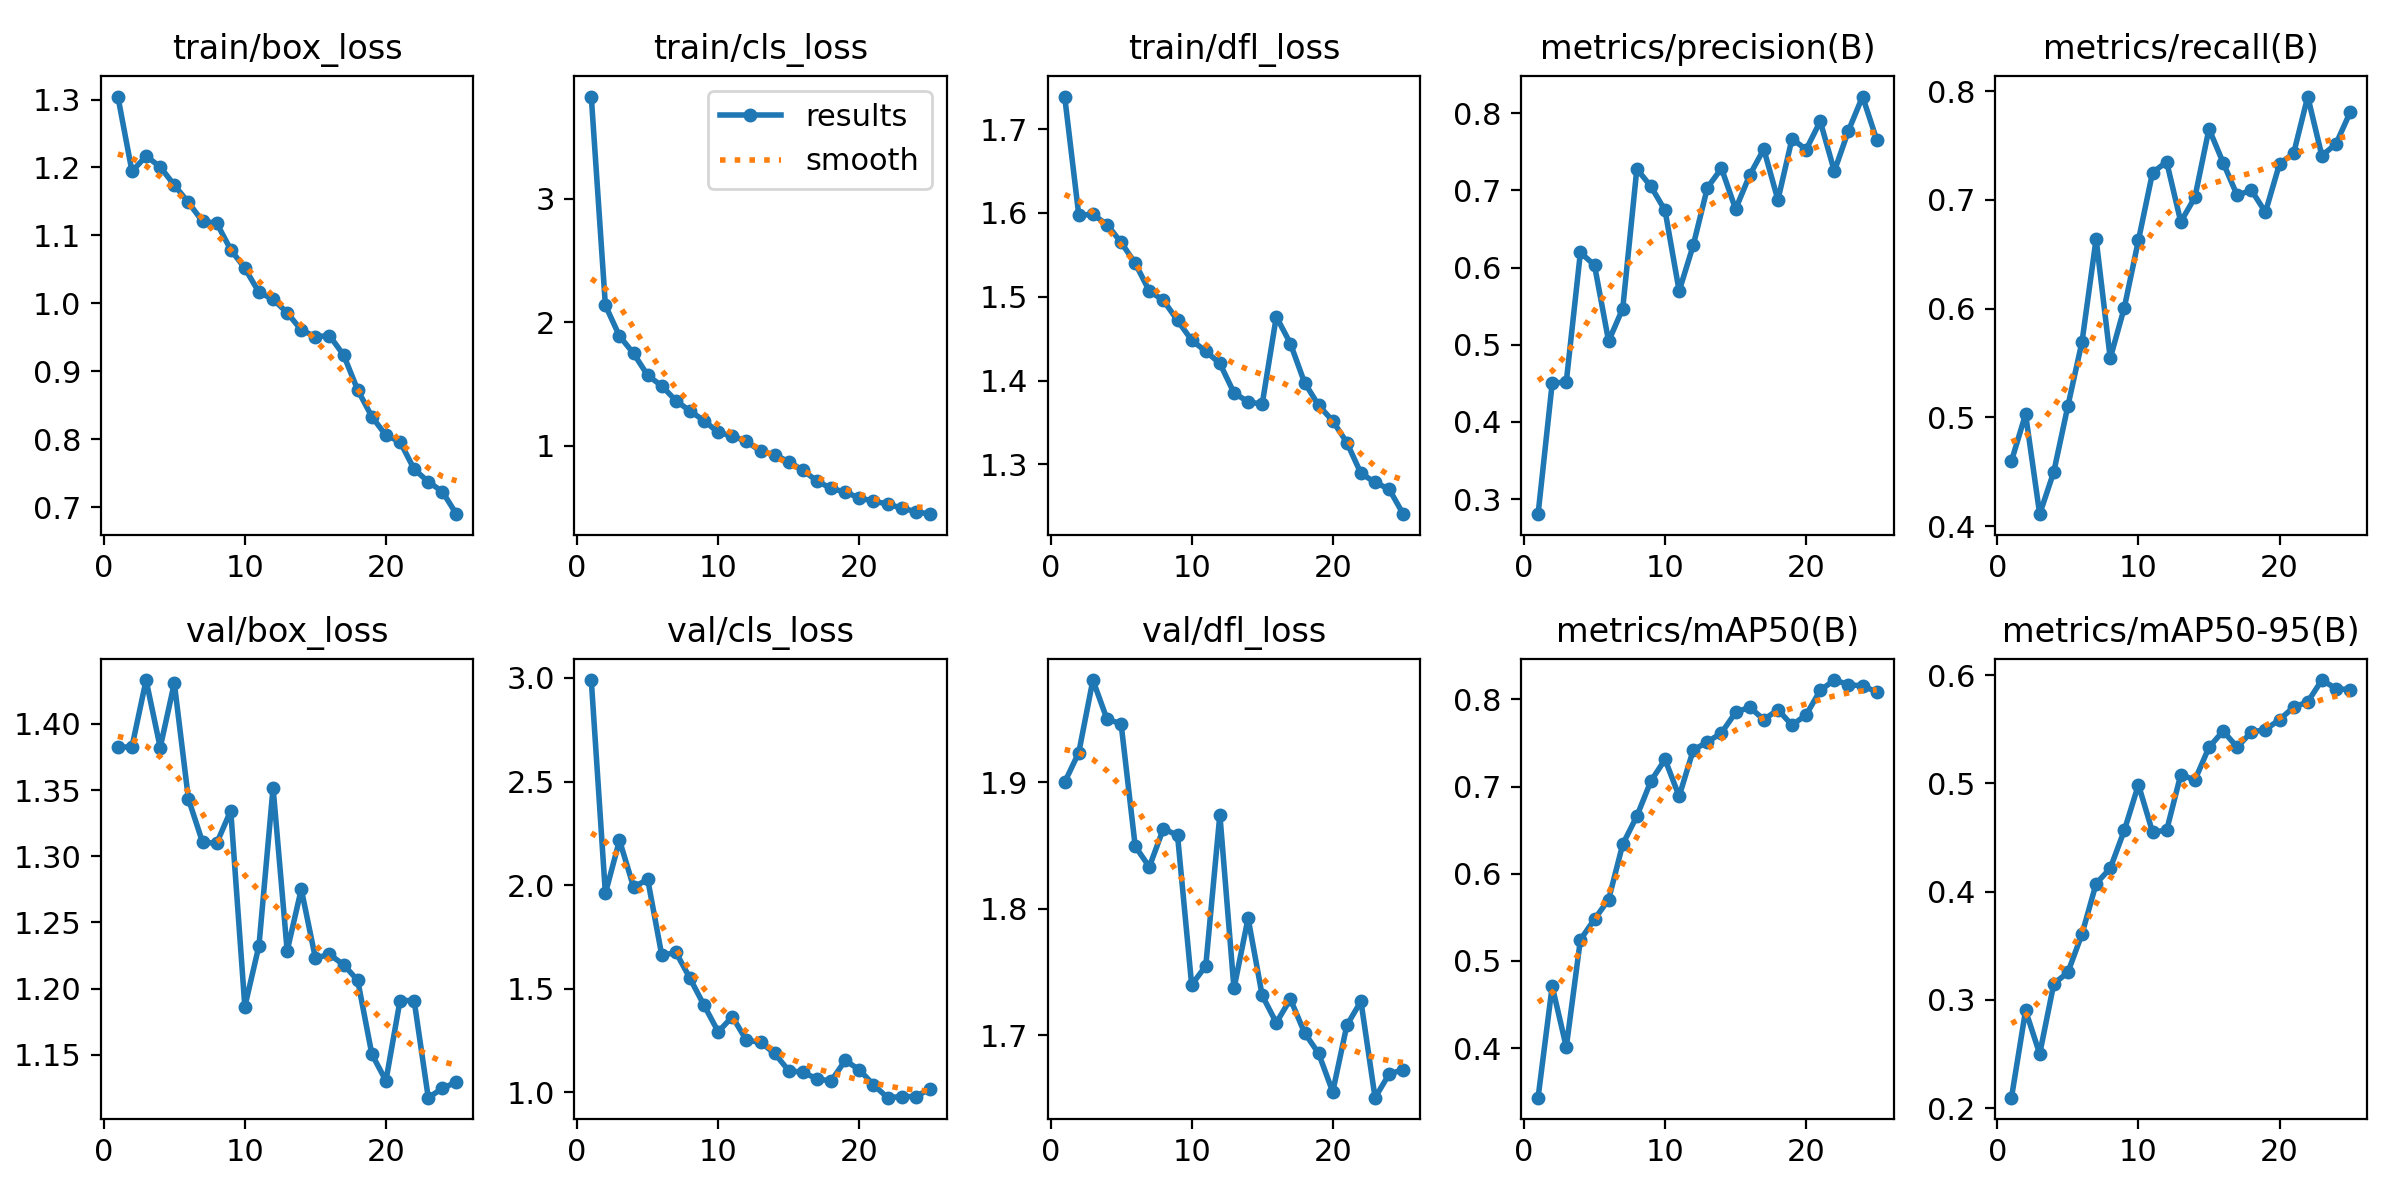

In [38]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


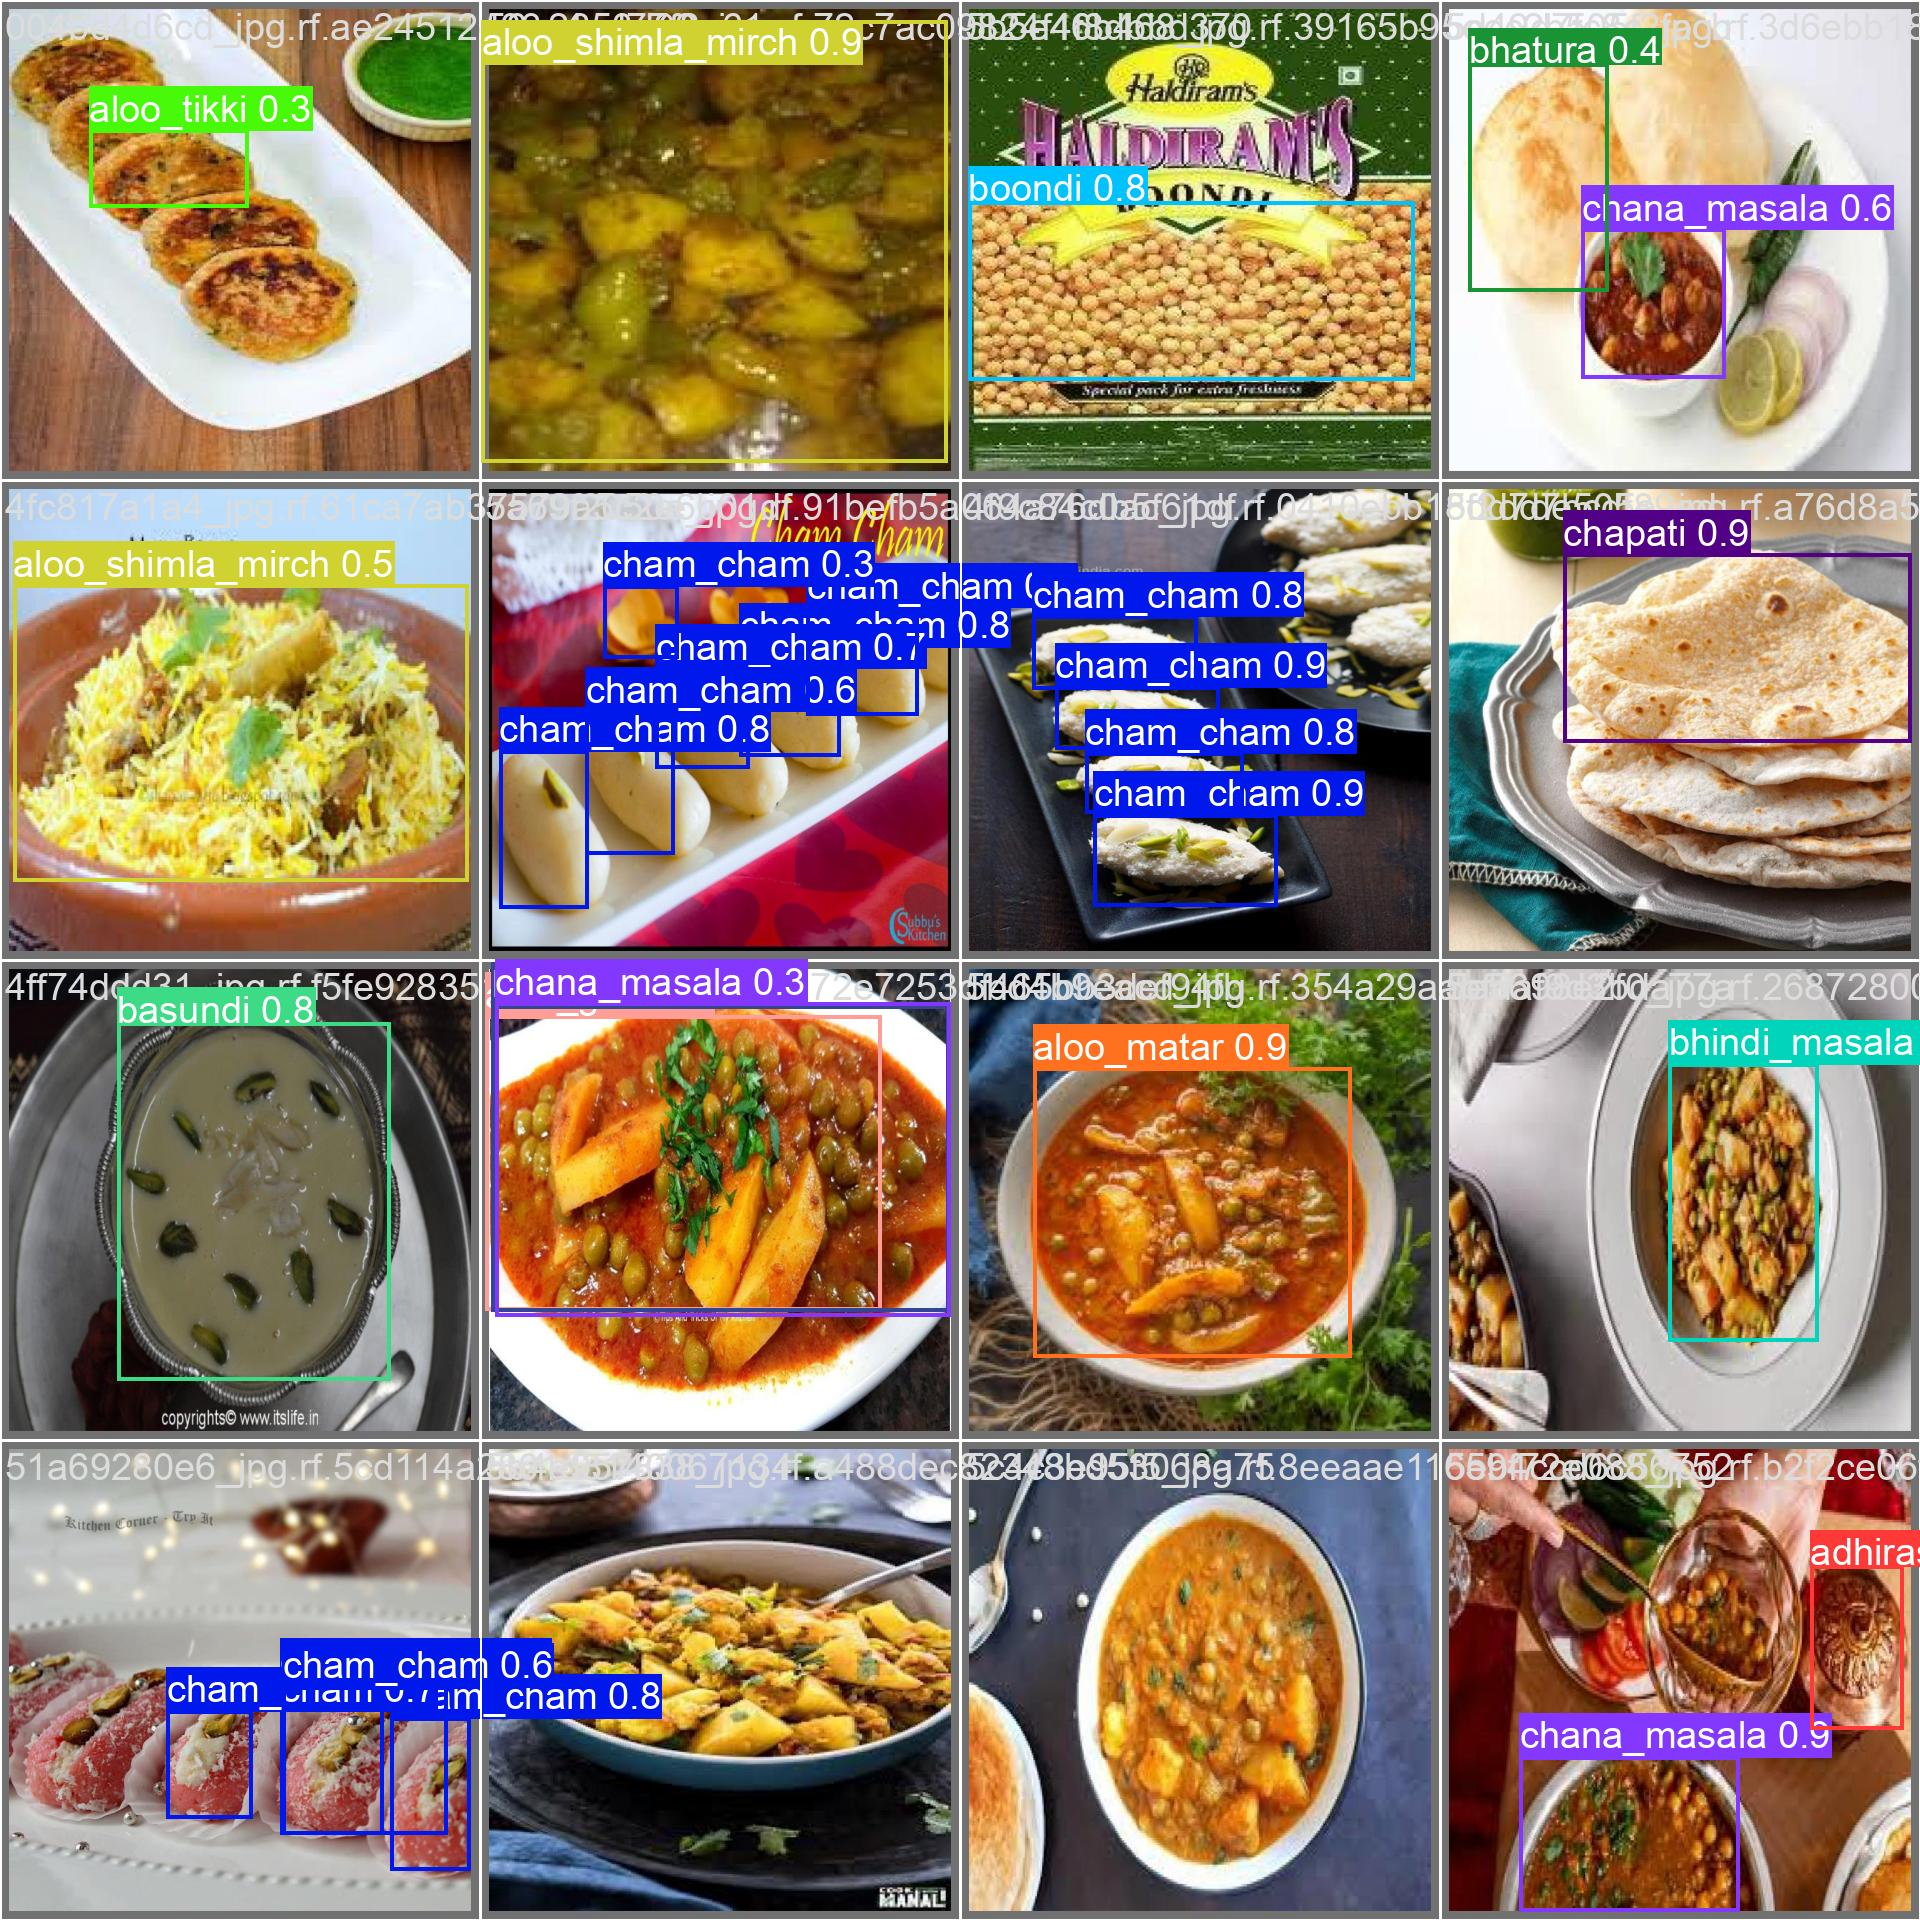

In [39]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [40]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132550 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Indian-Food-3/valid/labels.cache... 176 images, 1 backgrounds, 0 corrupt: 100% 176/176 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:10<00:00,  1.05it/s]
                   all        176        277      0.778       0.74      0.817      0.596
             adhirasam        176         33      0.828      0.606      0.767      0.531
             aloo_gobi        176         10      0.871      0.678      0.828      0.581
            aloo_matar        176         11       0.84      0.478      0.689      0.531
            aloo_methi        176         11          1      0.767      0.934      0.671
     aloo_shimla_mirch        176         10      0.688        0.7       0.73      0.628
            aloo_tikki    

In [41]:
!zip -r /content/runs.zip /content/runs

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 6%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 7%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 2%)
updating: content/runs/detect/train/train_batch1740.jpg (deflated 6%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 1%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 7%)
updating: content/runs/detect/train/PR_curve.png (deflated 10%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 7%)
updating: content/runs/detect/train/train_batch2.jpg (deflated 1%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 8%)
updating: content/runs/detect/train/weights/last.pt (deflated 8%)
updating: content/runs/detect/train/labels_correlogram.jpg (de

## Inference with Custom Model

In [42]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132550 parameters, 0 gradients, 28.5 GFLOPs

image 1/88 /content/datasets/Indian-Food-3/test/images/00df26e2ac_jpg.rf.c0c1b1f503ab3014828bb91fe6a275ea.jpg: 800x800 1 chicken_rezala, 22.6ms
image 2/88 /content/datasets/Indian-Food-3/test/images/02f2e49039_jpg.rf.ed9a5edb2f3b46916c695eaed41b932e.jpg: 800x800 4 adhirasams, 22.6ms
image 3/88 /content/datasets/Indian-Food-3/test/images/04d39a92fc_jpg.rf.01300765f2e03637e6445465eda40ccf.jpg: 800x800 1 biryani, 22.5ms
image 4/88 /content/datasets/Indian-Food-3/test/images/06d8a495b7_jpg.rf.8c3b672f5368ea9044432c15e5d2744e.jpg: 800x800 1 butter_chicken, 22.5ms
image 5/88 /content/datasets/Indian-Food-3/test/images/08a8cb6983_jpg.rf.f3fbfd80b4dca9885f41cd9443f5f918.jpg: 800x800 1 aloo_methi, 22.5ms
image 6/88 /content/datasets/Indian-Food-3/test/images/08e086039e_jpg.rf.8c036226c52391dcd1d5eb79ded01bea.jpg: 800x8

**NOTE:** Let's take a look at few results.

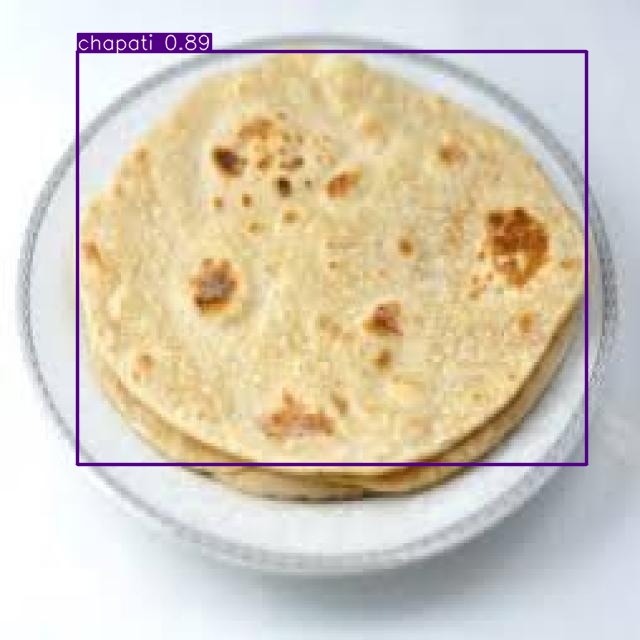

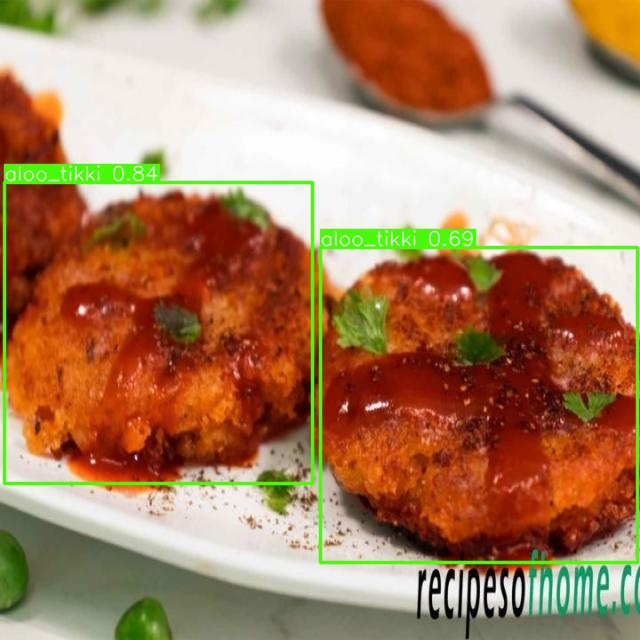

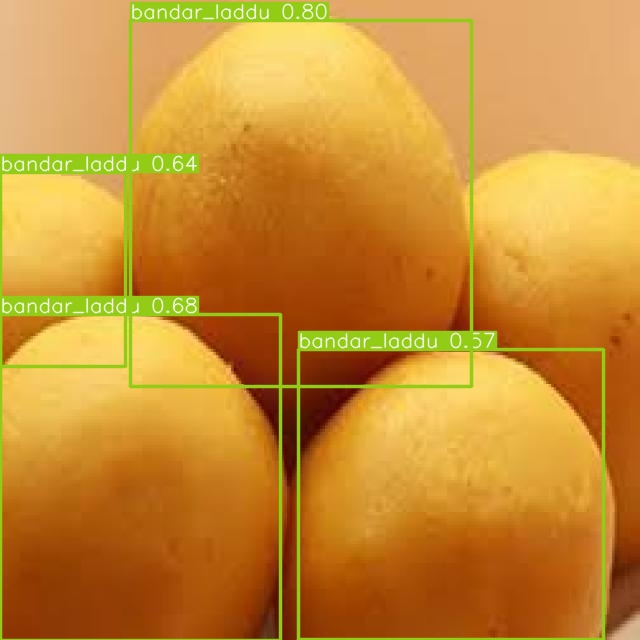

In [43]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Download the files for tflite conversion

In [44]:
from google.colab import files
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
files.download("/content/yolov8s.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
files.download("/content/yolov8n.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>